In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme(style="whitegrid", context="talk", palette="viridis") # Estilo global do Seaborn
plt.rcParams['figure.figsize'] = (10, 6) # Configurações padrões do Matplotlib para todo notebook (não utilizada porém fica de exemplo, cada gráfico ficou com tamanho distinto). 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [ ]:
df = pd.read_csv(
    'clean_cafe_sales.csv',
    parse_dates=['data_transacao'], # Converte em data ainda no motor da execução
    dtype={ # Tipos otimizados
        'item': 'category',
        'metodo_pagamento': 'category',
        'local': 'category',
        'quantidade': 'int32',
        'preco_unitario': 'float32'
    }
)

df.info()

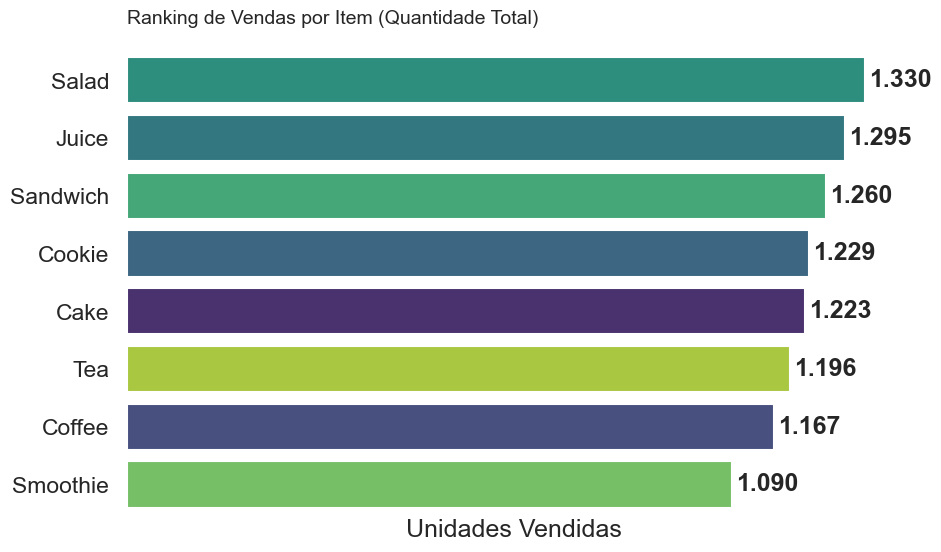

In [25]:
vendas_por_item = df.groupby('item', observed=True)['quantidade'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=vendas_por_item,
    x='quantidade',
    y='item',
    hue='item',
    palette='viridis',
    order=vendas_por_item['item']
)

for container in ax.containers:
    labels = [f'{val:,.0f}'.replace(',', '.') for val in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontweight='bold')

plt.title('Ranking de Vendas por Item (Quantidade Total)', loc='left', fontsize=14, pad=20)
plt.xlabel('Unidades Vendidas')
plt.ylabel('')
sns.despine(left=True, bottom=True)
ax.set(xticks=[])

plt.show()

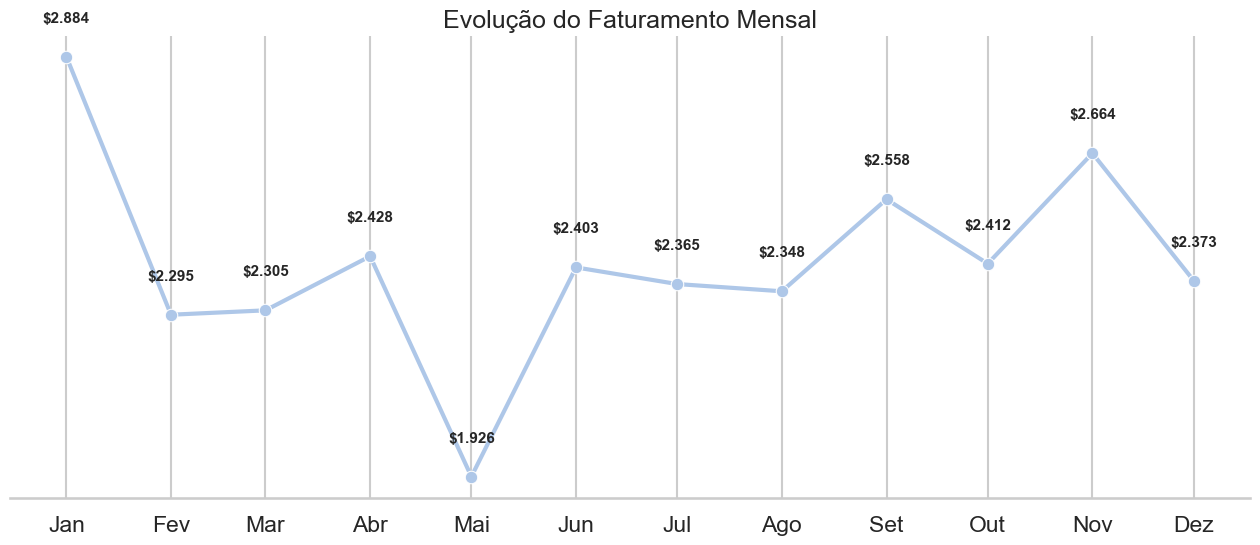

In [28]:
vendas_diarias = df.groupby(df['data_transacao'].dt.to_period('M'))['total_final'].sum().reset_index()
vendas_diarias['data_transacao'] = vendas_diarias['data_transacao'].dt.to_timestamp()

meses_pt = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}

plt.figure(figsize=(16, 6))

ax = sns.lineplot(data=vendas_diarias, x='data_transacao', y='total_final', marker='o', color='#AEC7E8', linewidth=3)

for x, y in zip(vendas_diarias['data_transacao'], vendas_diarias['total_final']):
    texto_valor = f'${y:,.0f}'.replace(',', '.')
    
    ax.annotate(
        texto_valor,
        xy=(x, y),
        xytext=(0, 25),
        textcoords='offset points',
        ha='center',
        fontweight='bold',
        fontsize=11
    )

ax.set_xticks(vendas_diarias['data_transacao'])
labels = [meses_pt[dt.month] for dt in vendas_diarias['data_transacao']]
ax.set_xticklabels(labels)

ax.set_yticks([])
plt.ylabel('')
plt.xlabel('')
sns.despine(left=True)
plt.title('Evolução do Faturamento Mensal')

plt.show()

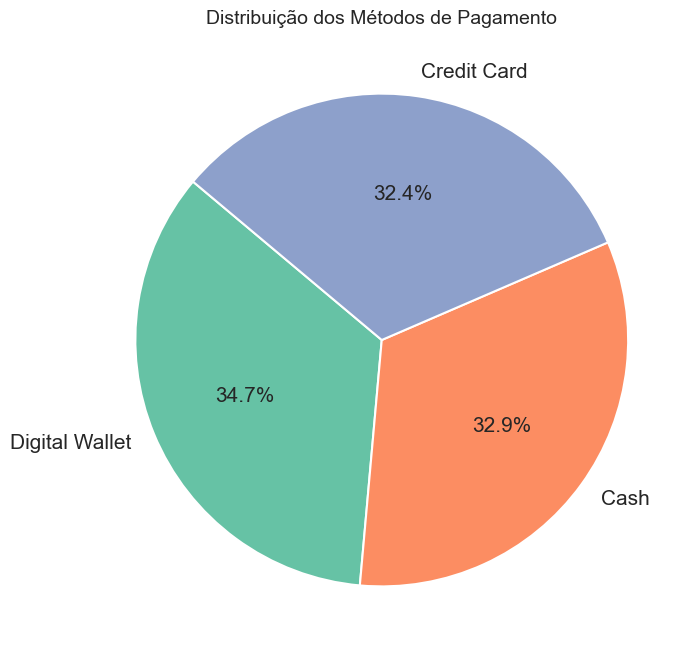

In [22]:
pgto_counts = df['metodo_pagamento'].value_counts()
plt.figure(figsize=(8, 8))

plt.pie(
    pgto_counts,
    labels=pgto_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2"),
    textprops={'fontsize': 15}
)
plt.title('Distribuição dos Métodos de Pagamento', fontsize=14)
plt.show()